In [192]:
#imports

import sys
print(sys.executable)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.table import Table
import torch
from pathlib import Path
import rasterio
from utils import augmentations, geofiles




/scratch2/Arno_MT/MT_env/bin/python


In [193]:
examples_losses = torch.load("examples/examples_losses.pth")
print(examples_losses[-1])

examples_metrics = torch.load("examples/examples_metrics.pth")
print(examples_metrics[0])


('losangeles', '0000007168-0000005632', 0.2721923589706421, 0.2808005213737488, 0.28501343727111816, 0.1526913046836853, 0.9906976222991943)
('losangeles', '0000010240-0000020480', 0.8999999761581421, 0.75, 0.0, 1.0, 1.0, 0.0, 0.9473683834075928, 0.8571428656578064, 0.0, 0.8999999761581421, 0.75, 0.0, 0.9935455918312073, 0.9949730038642883, 0.9169371724128723)


In [194]:
def _get_sentinel1_data(site, patch_id):
    file = Path('../GM12_GUM/' + site + f'/sentinel1/sentinel1_{site}_{patch_id}.tif')
    img, transform, crs = geofiles.read_tif(file)
    return np.nan_to_num(img).astype(np.float32), transform, crs

def _get_sentinel2_data(site, patch_id):
    file = Path('../GM12_GUM/' + site + f'/sentinel2/sentinel2_{site}_{patch_id}.tif')
    img, transform, crs = geofiles.read_tif(file)
    return np.nan_to_num(img).astype(np.float32), transform, crs

def _get_label_data(site, patch_id):
    label = "buildings"
    label_file = Path("../GM12_GUM/" + site + "/" + label + f'/{label}_{site}_{patch_id}.tif')
    img, transform, crs = geofiles.read_tif(label_file)
    img = img > 0
    return np.nan_to_num(img).astype(np.float32), transform, crs

def _get_pred_data(site, patch_id):
    file = Path('../GM12_GUM/' + site + f'/predictions_KTH/prediction_fusion_{patch_id}.tif')
    pred_fusion, transform, crs = geofiles.read_tif(file)
    file = Path('../GM12_GUM/' + site + f'/predictions_KTH/prediction_SAR_{patch_id}.tif')
    pred_SAR, _, _ = geofiles.read_tif(file)
    file = Path('../GM12_GUM/' + site + f'/predictions_KTH/prediction_optical_{patch_id}.tif')
    pred_optical, _, _ = geofiles.read_tif(file)
    return np.nan_to_num(pred_fusion).astype(np.float32), np.nan_to_num(pred_SAR).astype(np.float32), np.nan_to_num(pred_optical).astype(np.float32), transform, crs

def get_rgb(x):

    quantile = 99

    rgb = np.flip(x[:,:,:3],axis=2)

    maxi = np.percentile(rgb[:,:,0].flatten(),quantile)
    mini = np.percentile(rgb[:,:,0].flatten(),100-quantile)
    rgb[:,:,0] = np.where(rgb[:,:,0] > maxi, maxi, rgb[:,:,0])
    rgb[:,:,0] = np.where(rgb[:,:,0] < mini, mini, rgb[:,:,0])
    rgb[:,:,0] = (rgb[:,:,0]-mini)/(maxi-mini)

    maxi = np.percentile(rgb[:,:,1].flatten(),quantile)
    mini = np.percentile(rgb[:,:,1].flatten(),100-quantile)
    rgb[:,:,1] = np.where(rgb[:,:,1] > maxi, maxi, rgb[:,:,1])
    rgb[:,:,1] = np.where(rgb[:,:,1] < mini, mini, rgb[:,:,1])
    rgb[:,:,1] = (rgb[:,:,1]-mini)/(maxi-mini)

    maxi = np.percentile(rgb[:,:,2].flatten(),quantile)
    mini = np.percentile(rgb[:,:,2].flatten(),100-quantile)
    rgb[:,:,2] = np.where(rgb[:,:,2] > maxi, maxi, rgb[:,:,2])
    rgb[:,:,2] = np.where(rgb[:,:,2] < mini, mini, rgb[:,:,2])
    rgb[:,:,2] = (rgb[:,:,2]-mini)/(maxi-mini)

    return rgb



houston 0000009472-0000011008


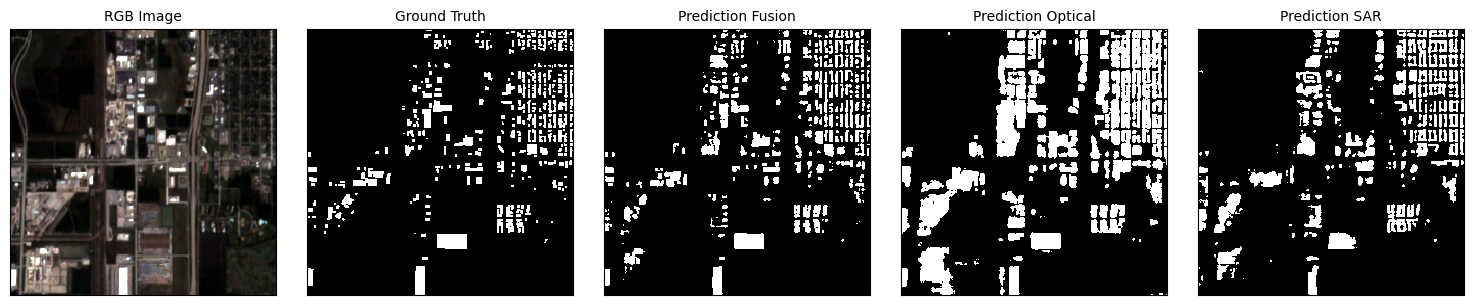

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


houston 0000010240-0000003584


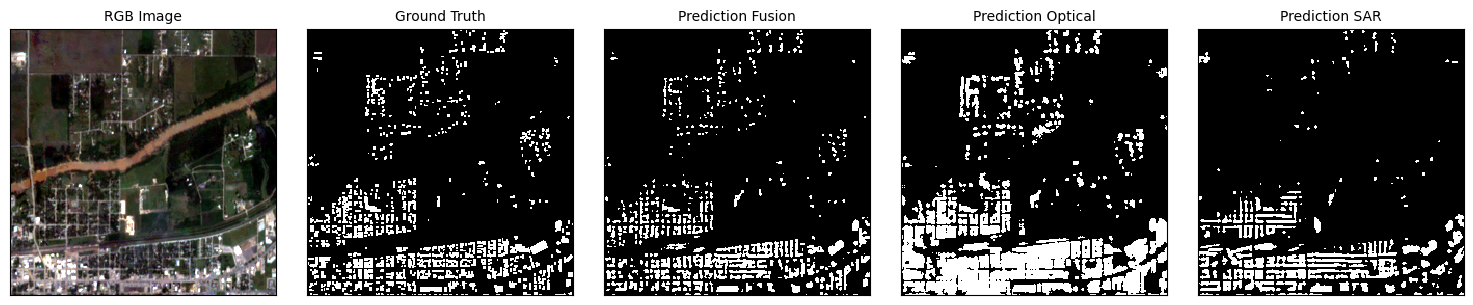

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


toronto 0000003840-0000003328


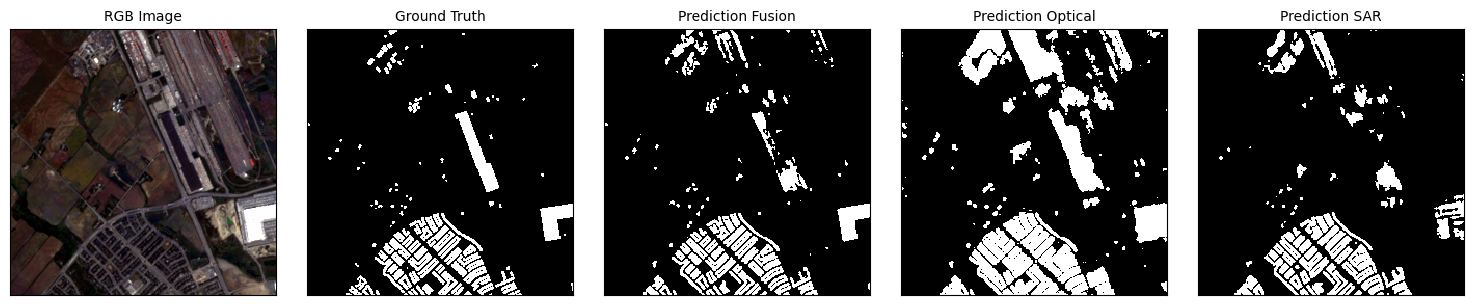

atlantawest 0000004864-0000002816


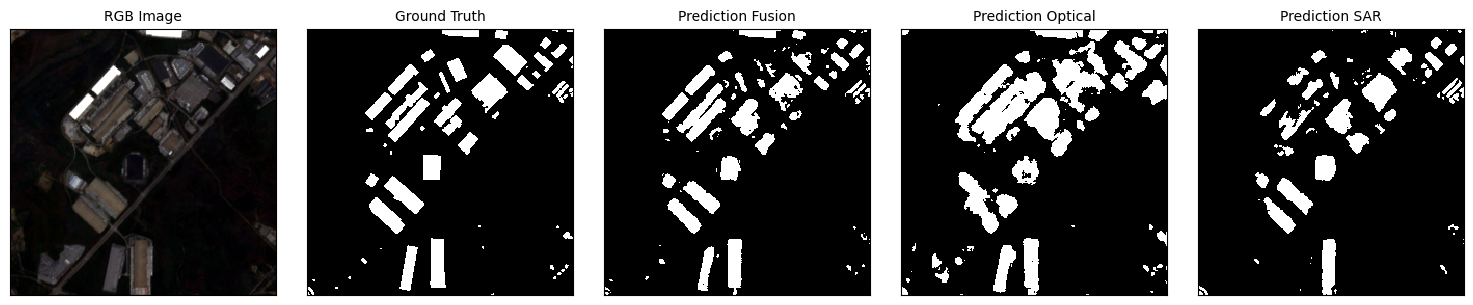

seattle 0000002816-0000004864


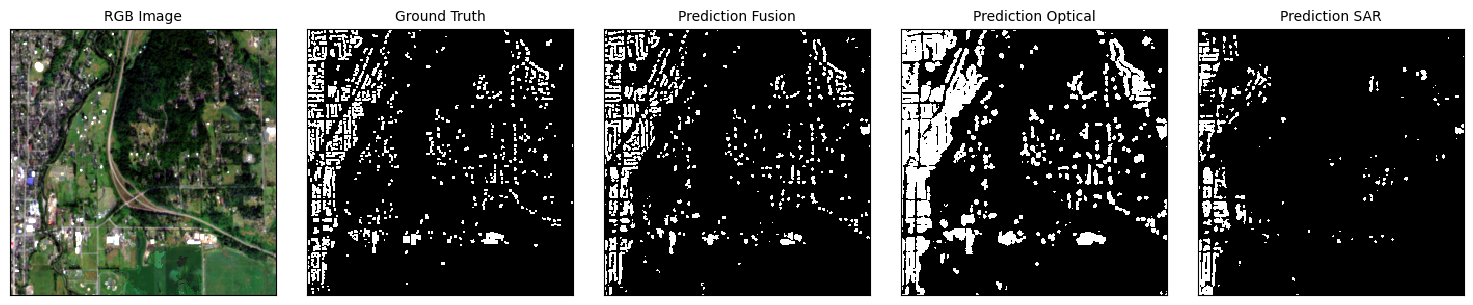

atlantawest 0000004352-0000001280


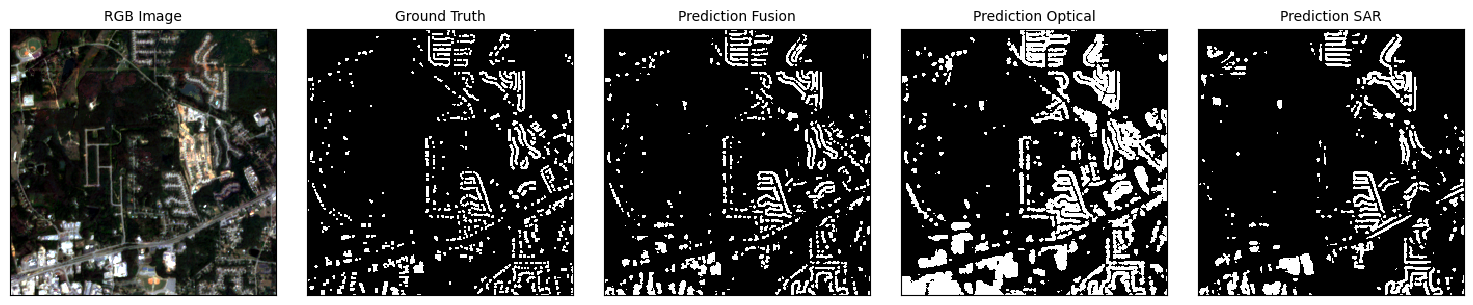

miami 0000011264-0000004608


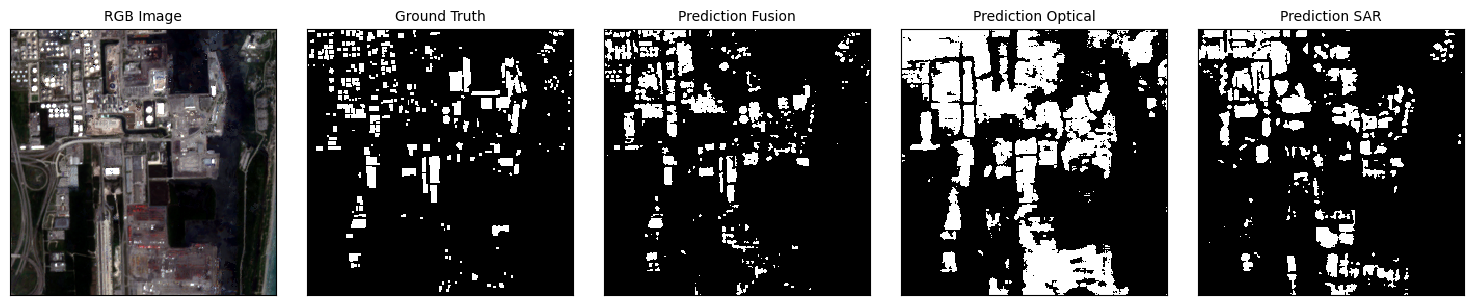

dallas 0000003840-0000010240


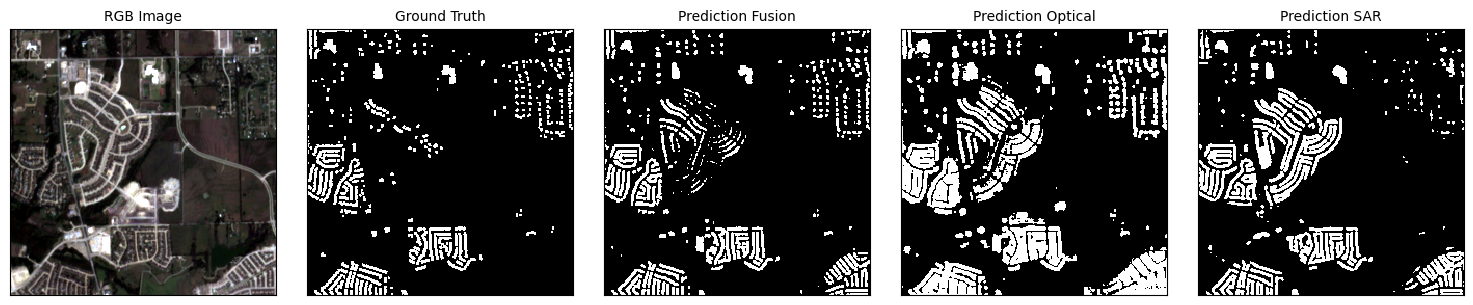

atlantawest 0000002560-0000002048


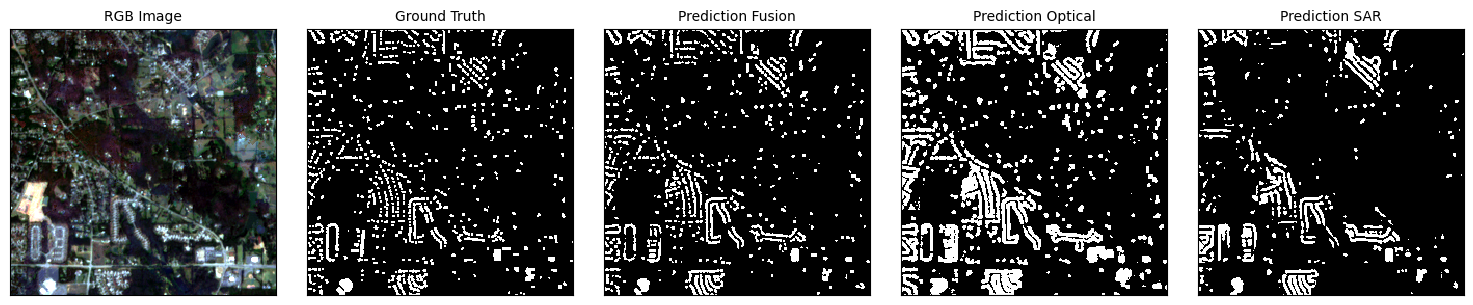

atlantawest 0000005120-0000001024


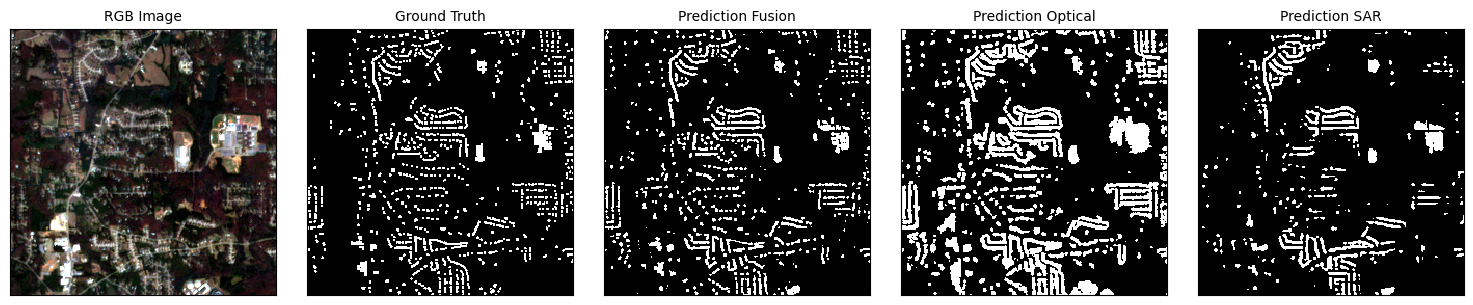

atlantaeast 0000003072-0000003840


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


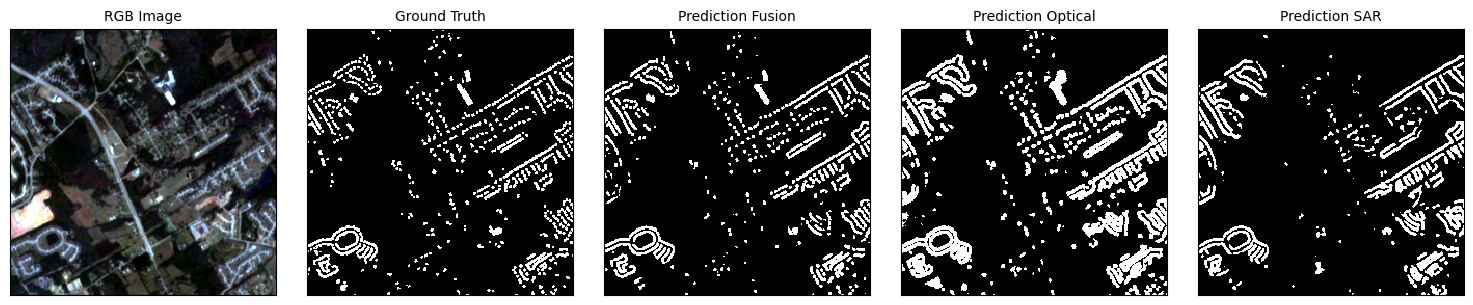

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


miami 0000005888-0000005376


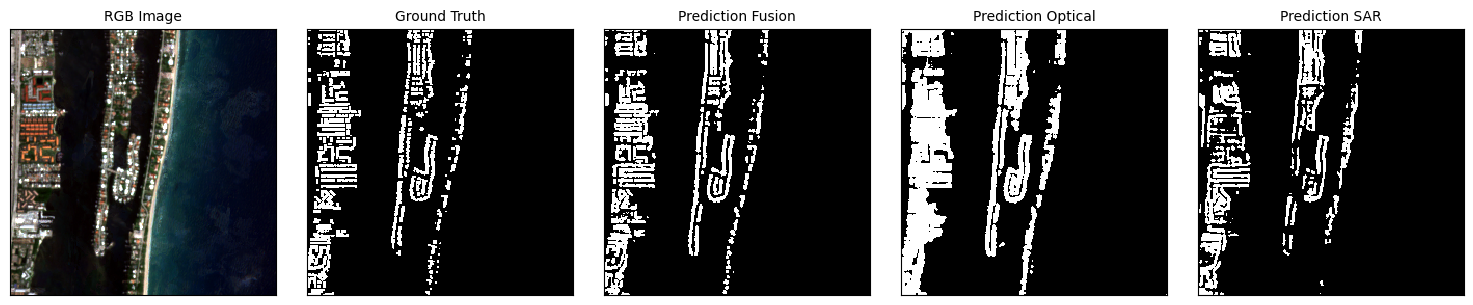

losangeles 0000001536-0000016128


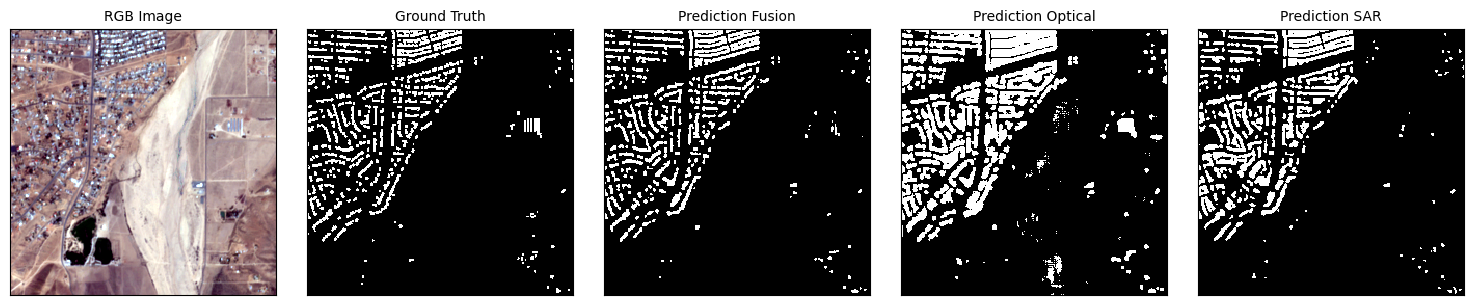

atlantawest 0000007936-0000003328


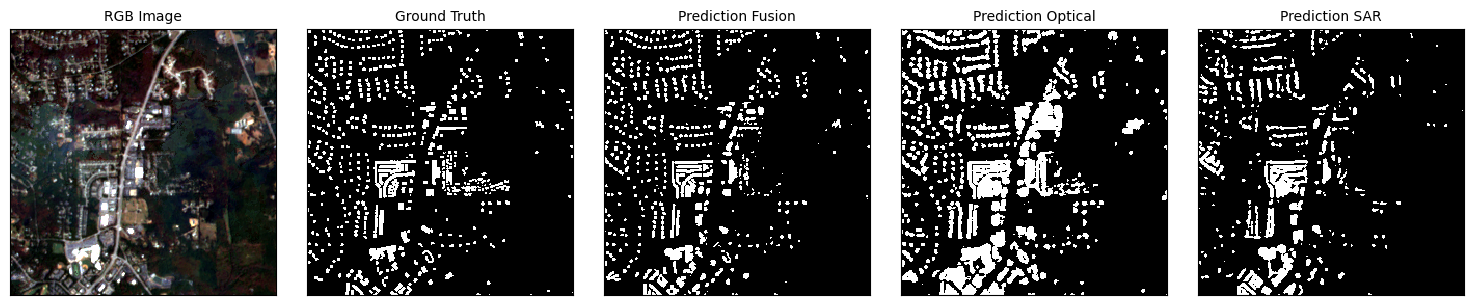

minneapolis 0000001024-0000005376


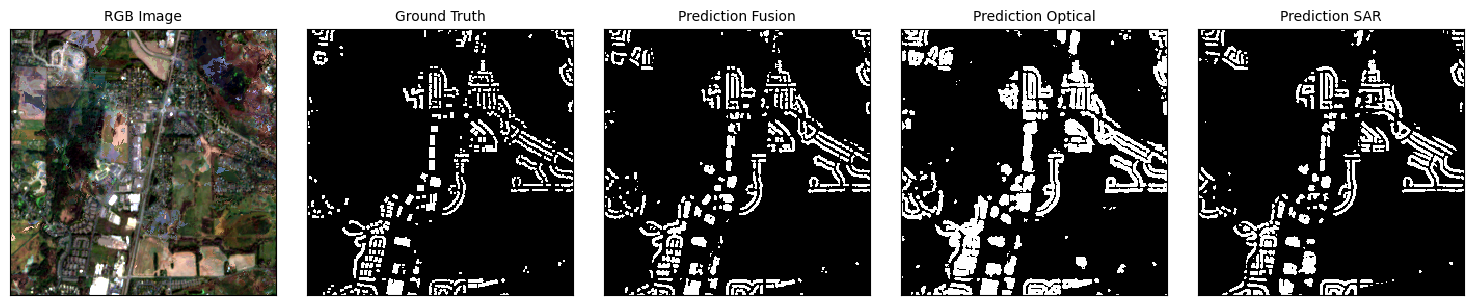

dallas 0000002560-0000004096


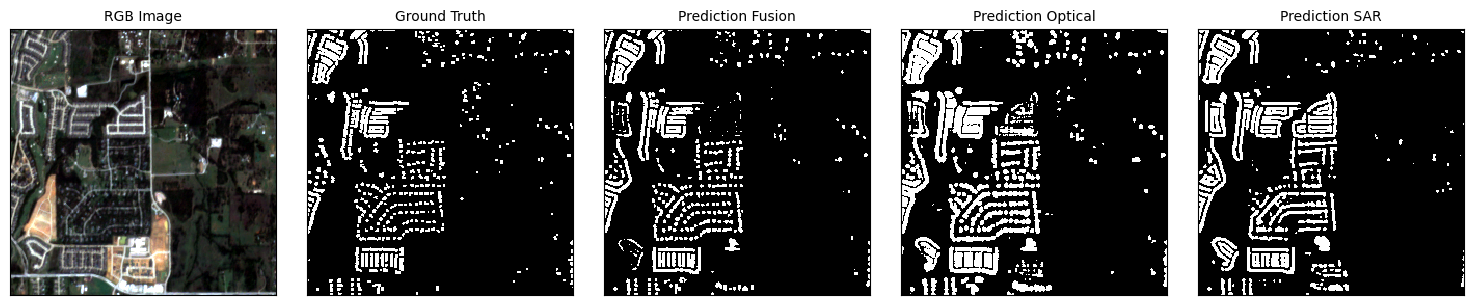

stgeorge 0000001536-0000000768


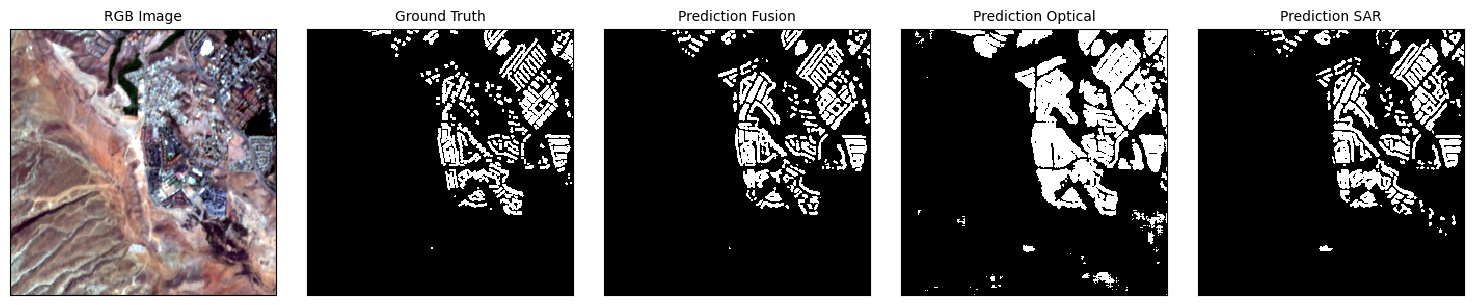

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


quebec 0000000512-0000000768


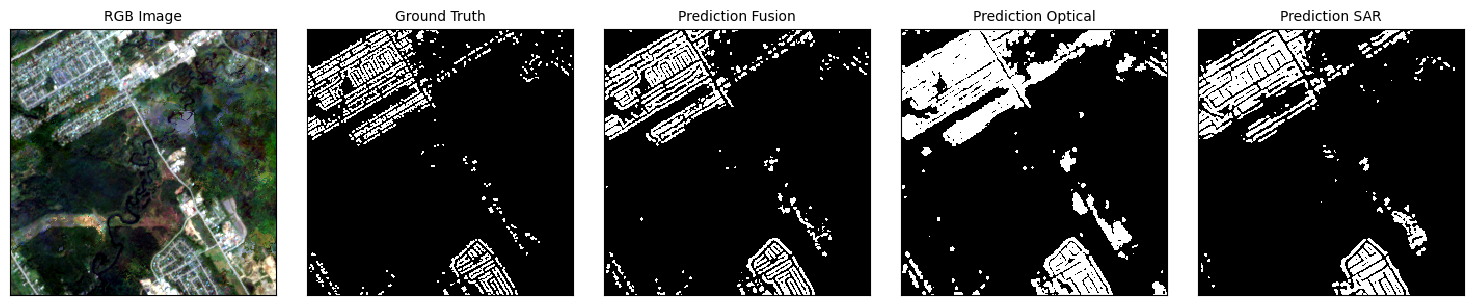

phoenix 0000005632-0000004864


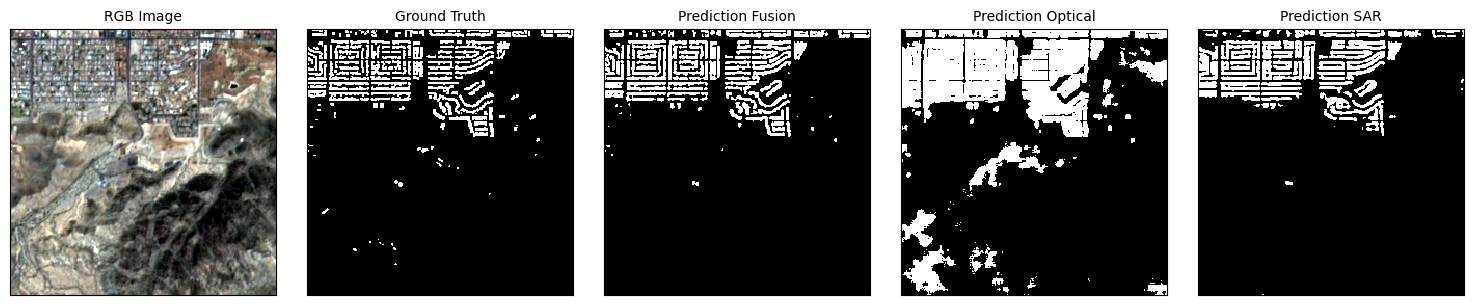

seattle 0000008704-0000001024


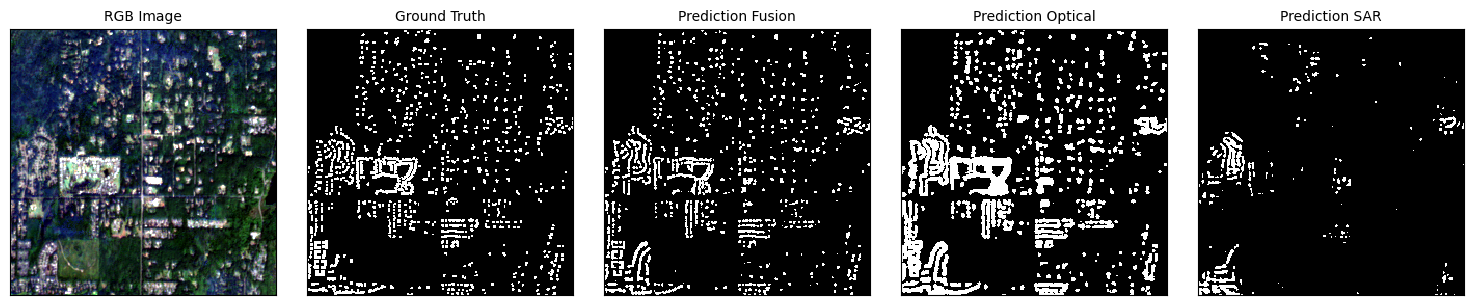

losangeles 0000013824-0000015616


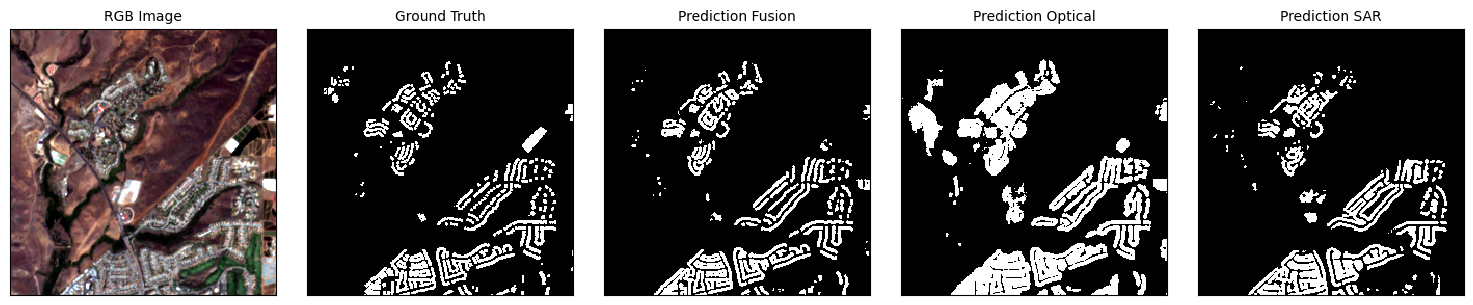

tucson 0000000768-0000001024


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


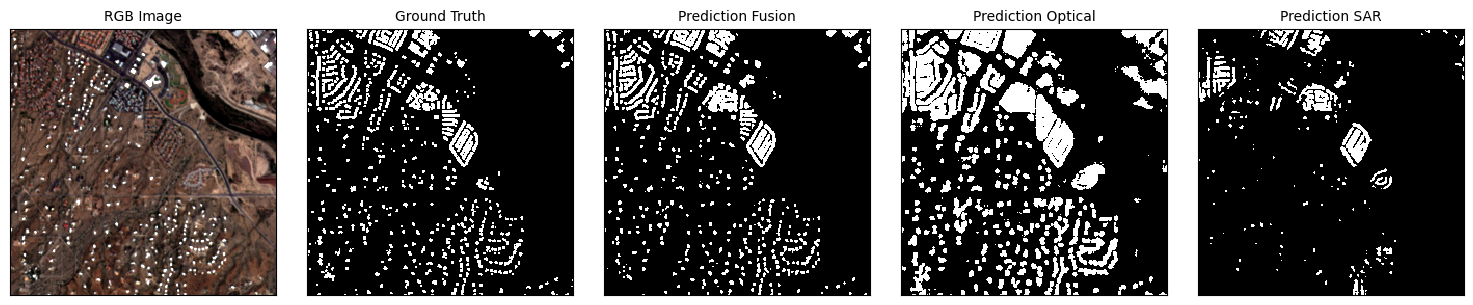

atlantawest 0000003072-0000001792


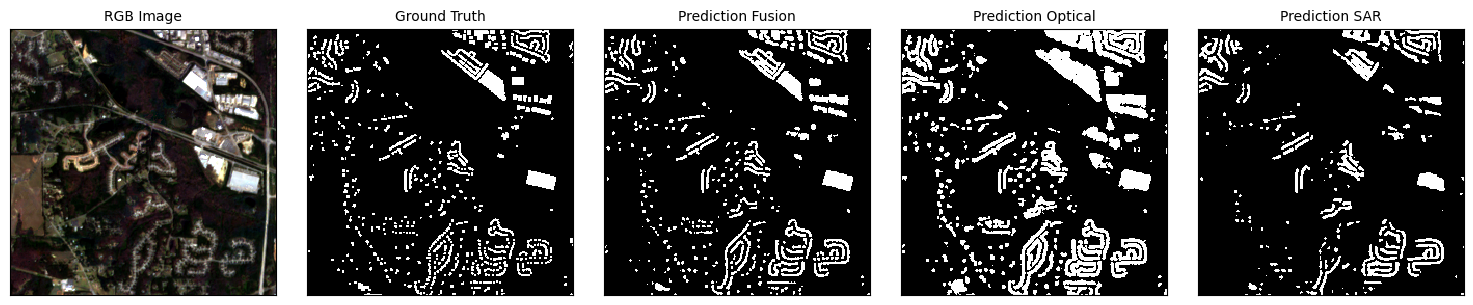

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


losangeles 0000000256-0000003584


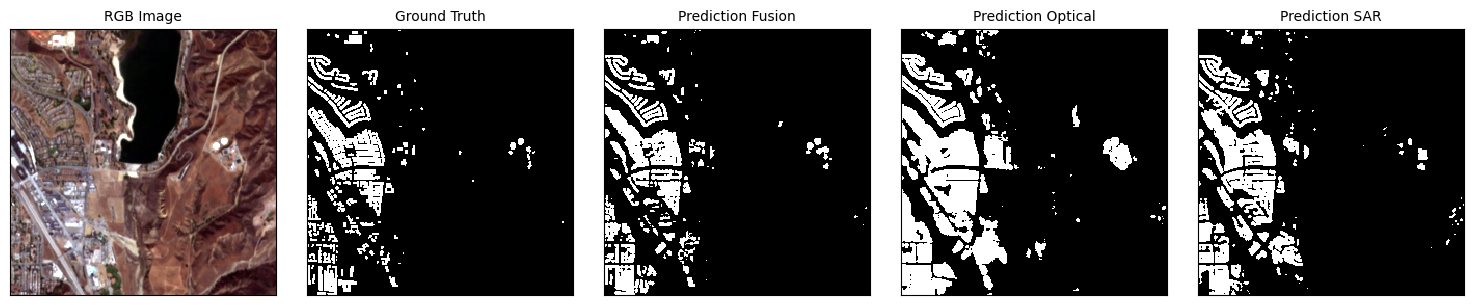

losangeles 0000011264-0000017664


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


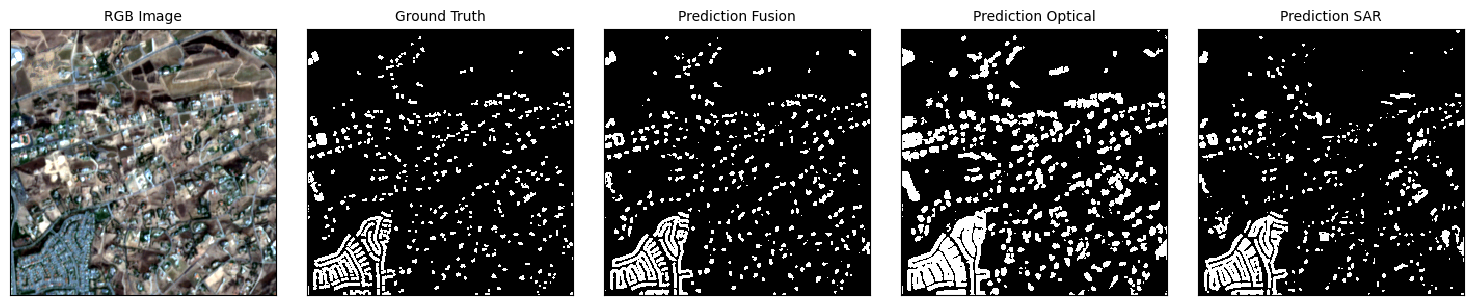

houston 0000008960-0000002304


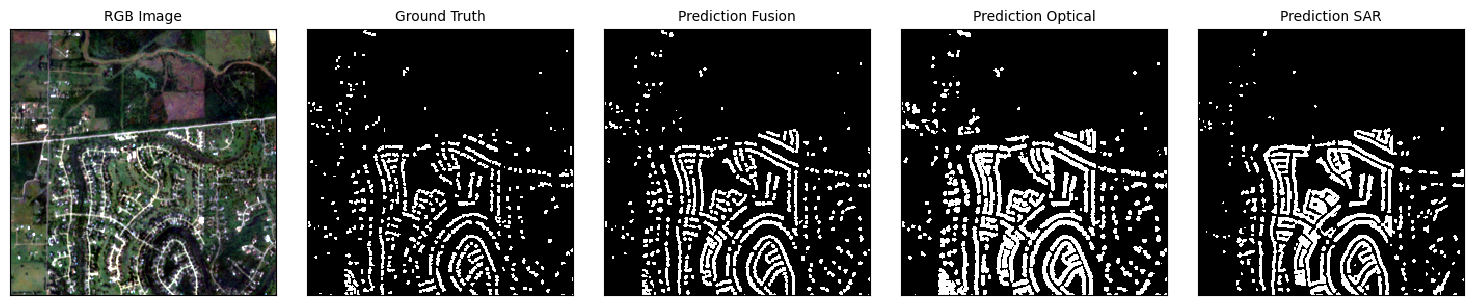

dallas 0000003328-0000004096


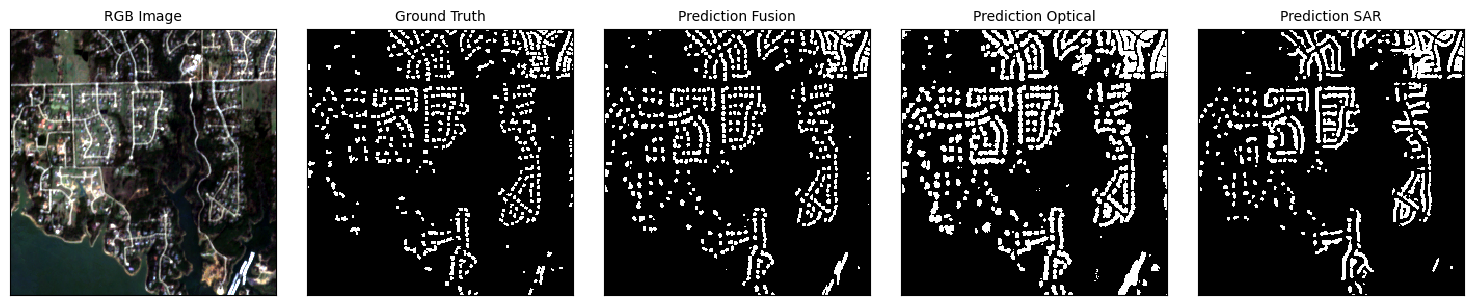

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


atlantawest 0000003840-0000003584


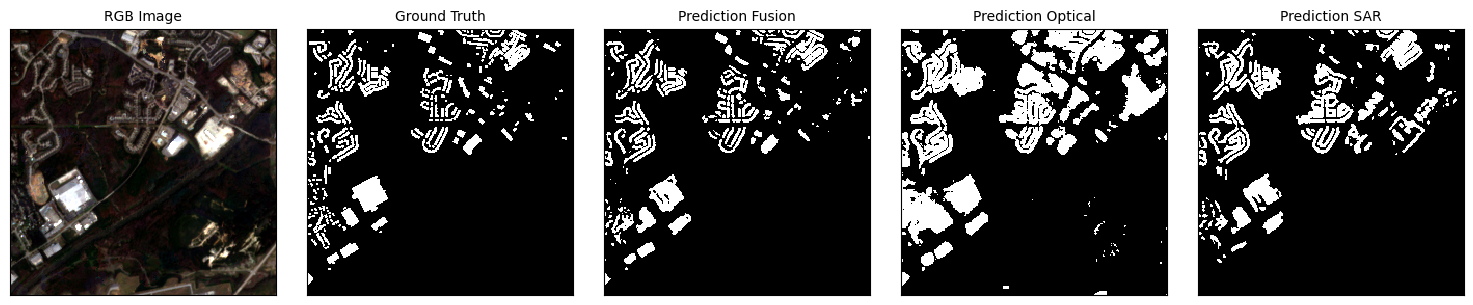

atlantawest 0000004864-0000004864


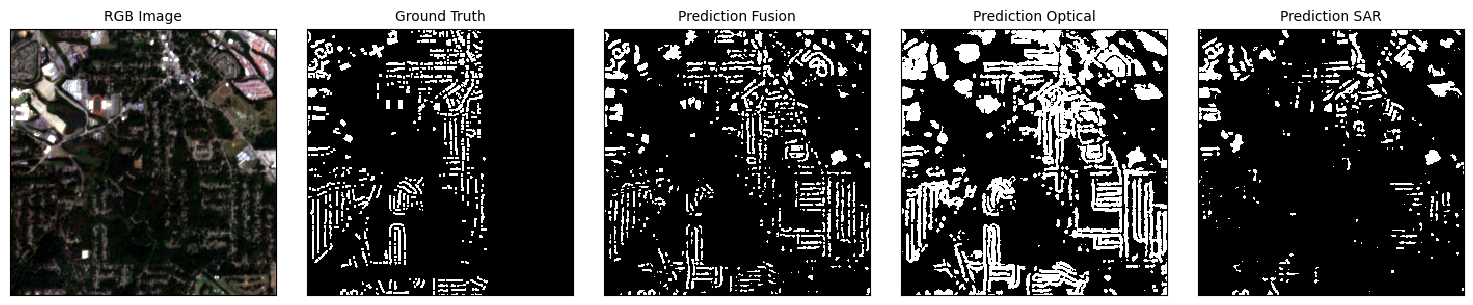

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


sydney 0000000768-0000001792


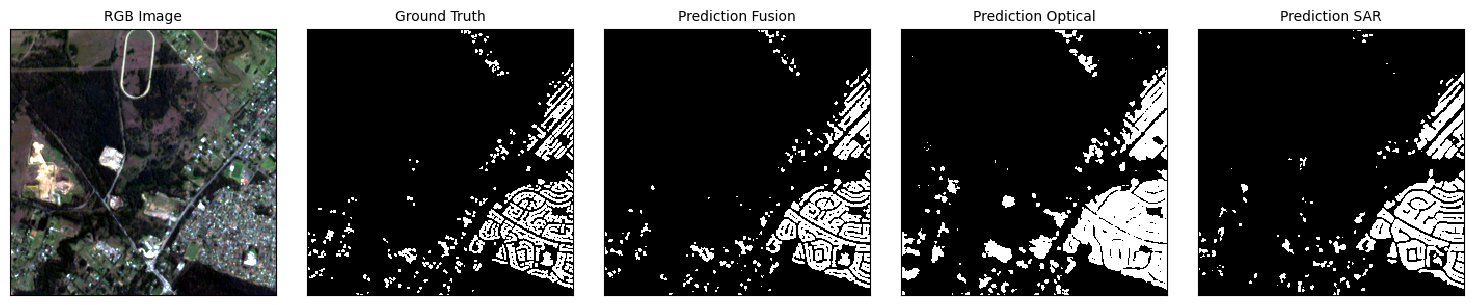

In [195]:

metric = "total_loss"
bestorworst = "best"
num_examples = 30
offset = 7000

if metric in ["fusion_loss", "optical_loss","sar_loss","consistency_loss", "total_loss"]:
    ind = ["fusion_loss", "optical_loss","sar_loss","consistency_loss", "total_loss"].index(metric) + 2
    examples_losses.sort(key=lambda x: x[ind], reverse=False)
    if bestorworst=="best":
        examples = examples_losses[offset:num_examples+offset]
    else:
        examples = examples_losses[-num_examples-offset:-offset]

if metric in ["prec_fusion", "prec_OPT", "prec_SAR", "rec_fusion", "rec_OPT", "rec_SAR",
                "f1_fusion","f1_OPT","f1_SAR","IoU_fusion","IoU_OPT","IoU_SAR","ssim_fusion","ssim_OPT","ssim_SAR"]:
    ind = ["prec_fusion", "prec_OPT", "prec_SAR", "rec_fusion", "rec_OPT", "rec_SAR",
           "f1_fusion","f1_OPT","f1_SAR","IoU_fusion","IoU_OPT","IoU_SAR","ssim_fusion","ssim_OPT","ssim_SAR"].index(metric) + 2
    examples_metrics.sort(key=lambda x: x[ind], reverse=True)
    if bestorworst=="best":
        examples = examples_metrics[offset:num_examples+offset]
    else:
        examples = examples_metrics[-num_examples-offset:-offset]

#examples = examples_metrics[19000:19010]


image_names = ['RGB Image', 'Ground Truth', 'Prediction Fusion', 'Prediction Optical', 'Prediction SAR']
metrics = ['Precision: ', 'Recall: ', 'F1-score: ', 'IoU: ', 'SSIM: ']

for example in examples:

    print(example[0], example[1])
    sen1,_,_ = _get_sentinel1_data(example[0], example[1])
    sen2,_,_ = _get_sentinel2_data(example[0], example[1])
    label,_,_ = _get_label_data(example[0], example[1])
    pred_fusion, pred_sar, pred_optical,_,_ = _get_pred_data(example[0], example[1])

    images = [get_rgb(sen2), label, pred_fusion>0.5, pred_optical>0.5, pred_sar>0.5]
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))

    # Iterate over the images and plot them in each subplot
    for i, image in enumerate(images):
        axes[i].imshow(image, interpolation="nearest", cmap="Greys_r")
        #axes[i].axis('off')
        # Remove the ticks
        axes[i].set_xticks([])
        axes[i].set_yticks([])
        
        # Add the image names and titles
        axes[i].set_title(image_names[i], fontsize=10)
        
        if metric in ["prec_fusion", "prec_OPT", "prec_SAR", "rec_fusion", "rec_OPT", "rec_SAR",
                "f1_fusion","f1_OPT","f1_SAR","IoU_fusion","IoU_OPT","IoU_SAR","ssim_fusion","ssim_OPT","ssim_SAR"]:
            if i >= 2:
                k=i-2
                # Create a table with the metrics
                table_data = [
                    [metrics[0], "{:.2f}".format(example[2+k])],
                    [metrics[1], "{:.2f}".format(example[5+k])],
                    [metrics[2], "{:.2f}".format(example[8+k])],
                    [metrics[3], "{:.2f}".format(example[11+k])],
                    [metrics[4], "{:.2f}".format(example[14+k])],
                ]
                table = axes[i].table(cellText=table_data, cellLoc='center', loc='bottom', bbox=[0, -0.6, 1, 0.5])

                # Style the table
                table.auto_set_font_size(True)
                #table.set_fontsize(8)
                table.scale(1, 1.5)

                # Add the table to the plot
                axes[i].add_table(table)


    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the plot for a report
    #plt.savefig('report_plot.png', dpi=300)

    # Display the plot
    plt.show()


prec_fusion


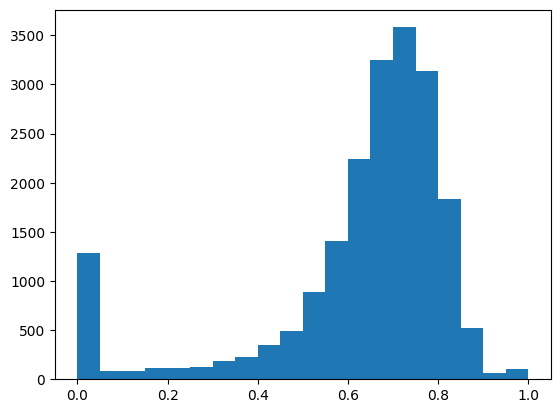

prec_OPT


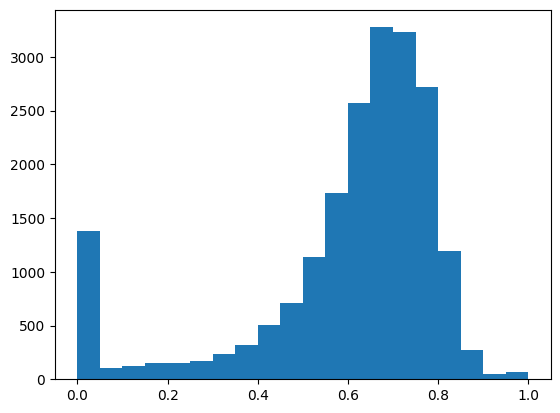

prec_SAR


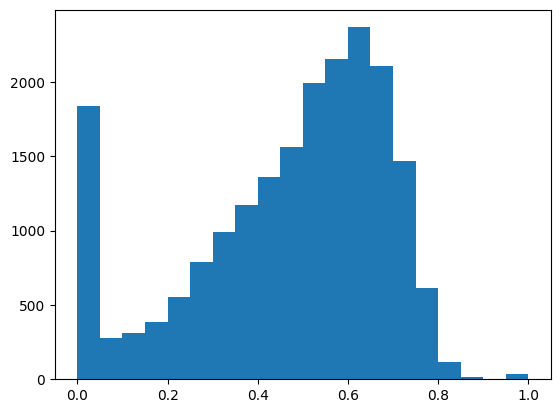

rec_fusion


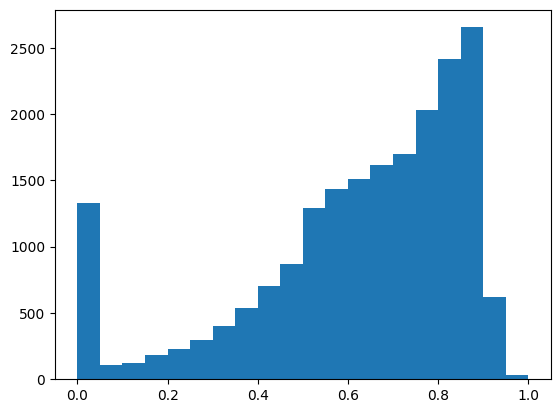

rec_OPT


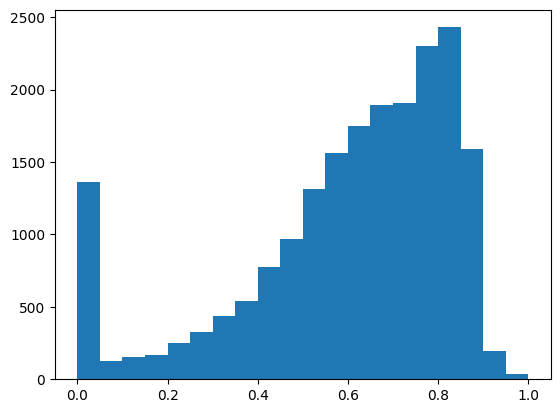

rec_SAR


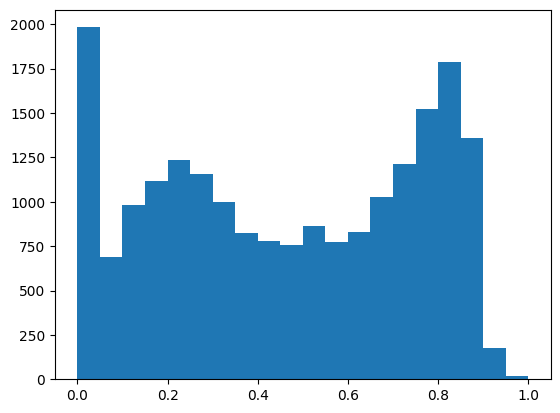

f1_fusion


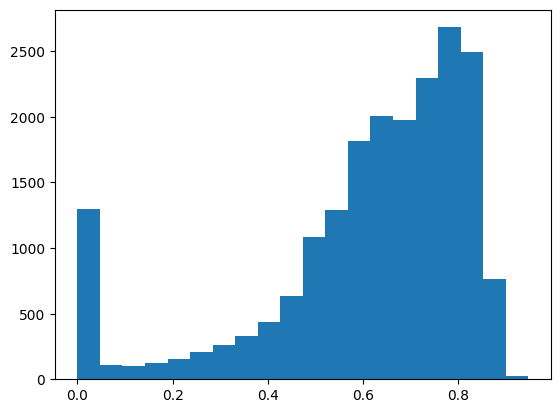

f1_OPT


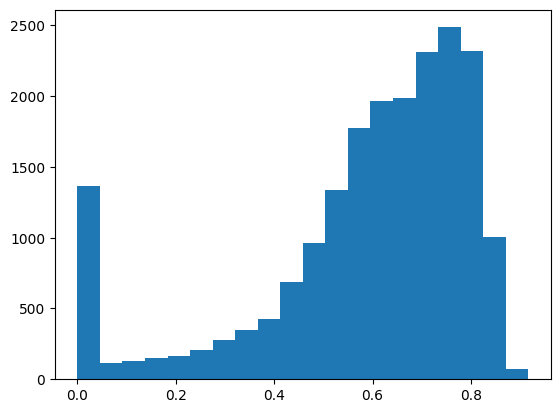

f1_SAR


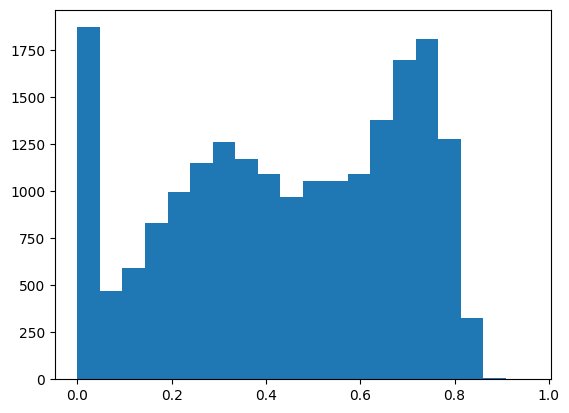

IoU_fusion


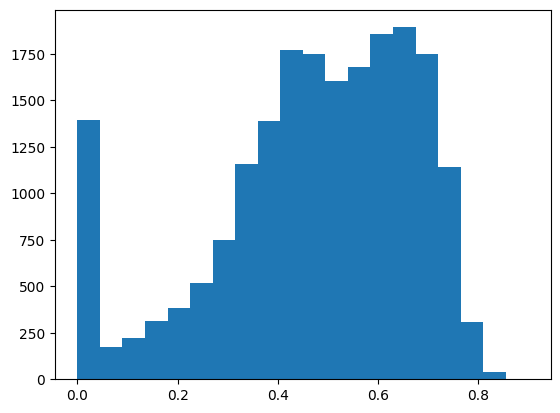

IoU_OPT


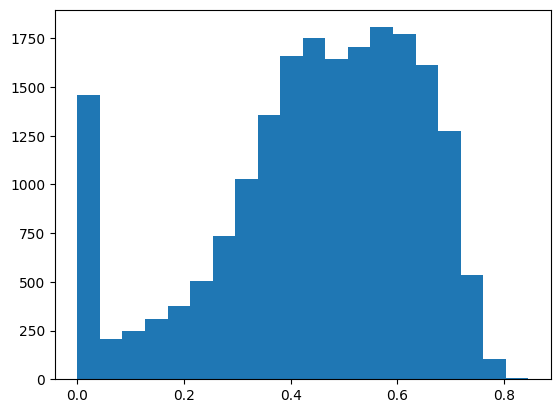

IoU_SAR


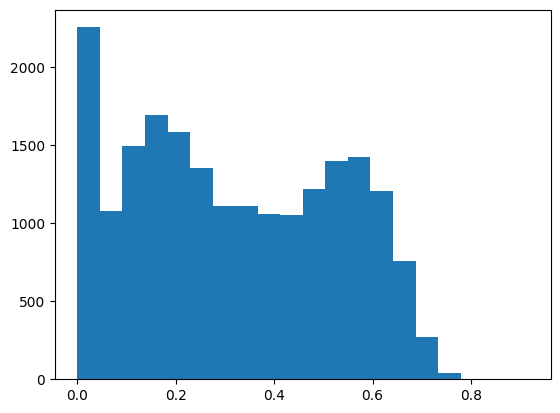

ssim_fusion


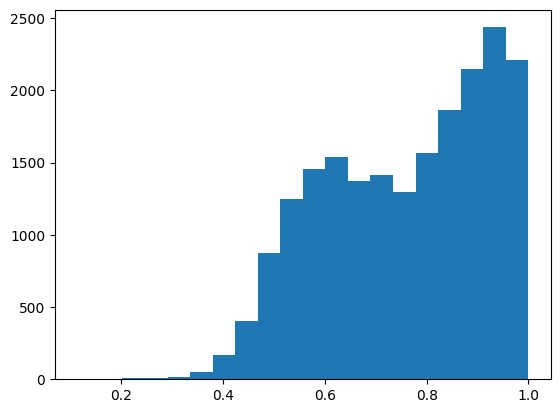

ssim_OPT


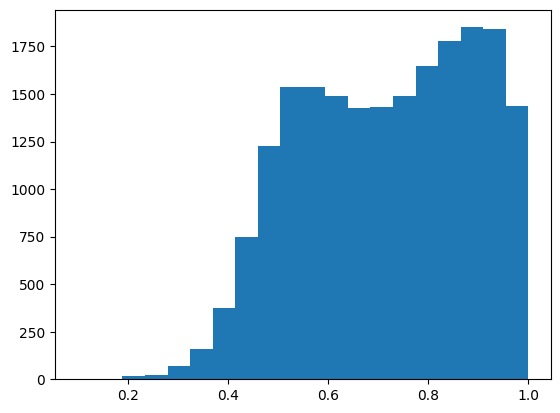

ssim_SAR


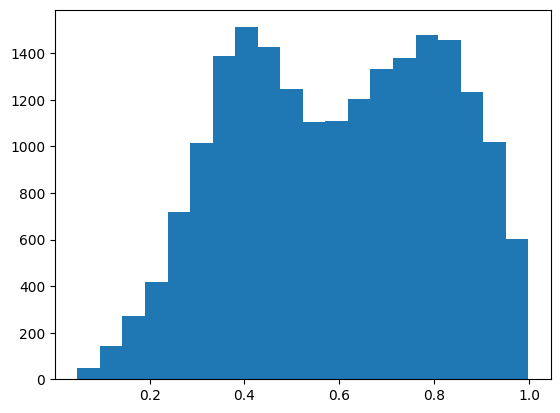

In [196]:
examples_metrics = np.asarray(examples_metrics,  dtype=object)

metrics = ["site", "patch_id","prec_fusion", "prec_OPT", "prec_SAR", "rec_fusion", "rec_OPT", "rec_SAR",
           "f1_fusion","f1_OPT","f1_SAR","IoU_fusion","IoU_OPT","IoU_SAR","ssim_fusion","ssim_OPT","ssim_SAR"]

for i in range(2,examples_metrics.shape[1]):
    print(metrics[i])
    hist, bins = np.histogram(examples_metrics[:,i], bins=20)

    plt.bar(bins[:-1], hist, width=np.diff(bins), align='edge')
    plt.show()

fusion_loss


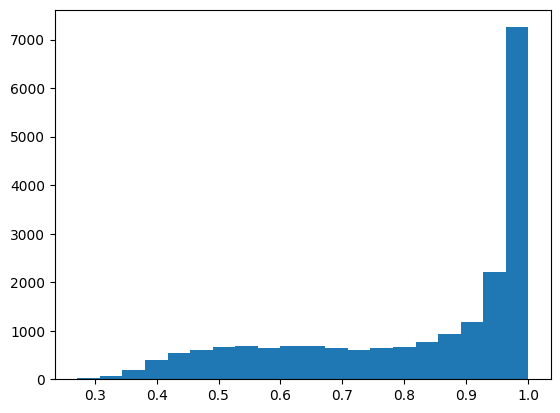

optical_loss


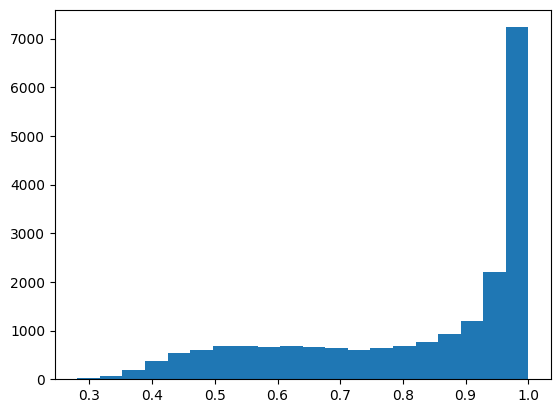

sar_loss


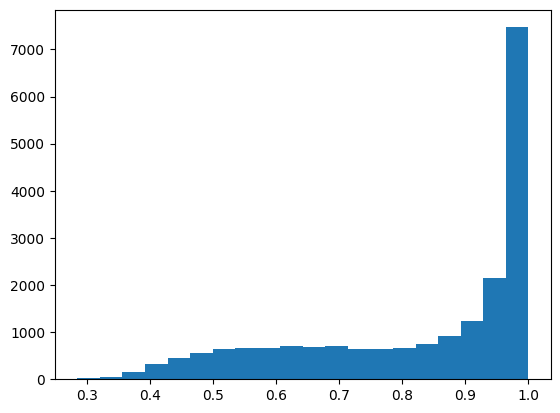

consistency_loss


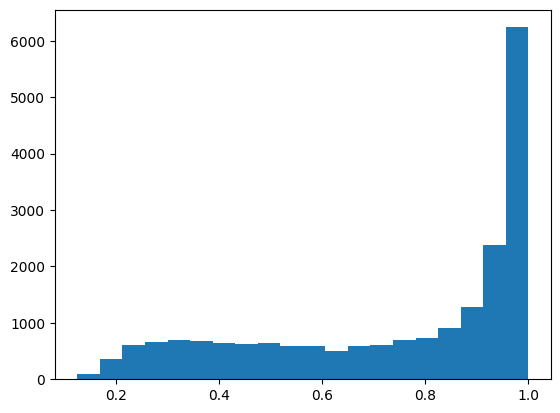

total_loss


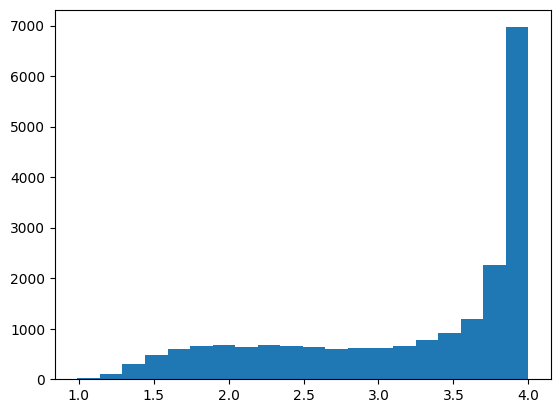

In [197]:
examples_losses = np.asarray(examples_losses,  dtype=object)

metrics = ["site", "patch_id", "fusion_loss", "optical_loss","sar_loss","consistency_loss", "total_loss"]

for i in range(2,examples_losses.shape[1]):
    print(metrics[i])
    hist, bins = np.histogram(examples_losses[:,i], bins=20)

    plt.bar(bins[:-1], hist, width=np.diff(bins), align='edge')
    plt.show()